In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline

c:\program files\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\program files\python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df = pd.read_csv("report_07-23.csv")

In [5]:
df.head()

,index,time_stamp,stop,stopName,number,direction,plannedTime,vehicleId,tripId,status,delay,seq_num
0,1,2018-07-23 06:00:45,378,Os.Piastów,21,Kopiec Wandy,2018-07-23 05:59:00,NaN,6351558574044883205,PLANNED,1,1.0
1,1,2018-07-23 06:00:47,612,Borsucza,22,Walcownia,2018-07-23 06:00:00,6.352185e+18,6351558574044899587,STOPPING,0,7.0
2,1,2018-07-23 06:00:48,572,Smolki,11,Czerwone Maki P+R,2018-07-23 06:00:00,6.352185e+18,6351558574044670211,STOPPING,0,10.0
3,1,2018-07-23 06:00:49,319,Jubilat,1,Wzgórza K.,2018-07-23 05:59:00,NaN,6351558574044363010,PLANNED,1,3.0
4,1,2018-07-23 06:00:49,322,Filharmonia,8,Bronowice Małe,2018-07-23 06:01:00,6.352185e+18,6351558574044592386,STOPPING,0,15.0


In [6]:
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71517 entries, 0 to 71516
Data columns (total 12 columns):
index          71517 non-null int64
time_stamp     71517 non-null object
stop           71517 non-null int64
stopName       71517 non-null object
number         71517 non-null int64
direction      71517 non-null object
plannedTime    71517 non-null object
vehicleId      64221 non-null float64
tripId         71517 non-null int64
status         71517 non-null object
delay          71517 non-null int64
seq_num        70833 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 6.5+ MB


In [7]:
df.isnull().sum()

index             0
time_stamp        0
stop              0
stopName          0
number            0
direction         0
plannedTime       0
vehicleId      7296
tripId            0
status            0
delay             0
seq_num         684
dtype: int64

In [9]:
df.delay.value_counts(normalize=True)

0     0.426905
1     0.344715
2     0.123509
3     0.055987
4     0.025421
5     0.011410
6     0.004852
7     0.002657
8     0.001189
9     0.000867
10    0.000587
14    0.000503
12    0.000475
11    0.000350
13    0.000336
15    0.000154
16    0.000042
19    0.000028
18    0.000014
Name: delay, dtype: float64

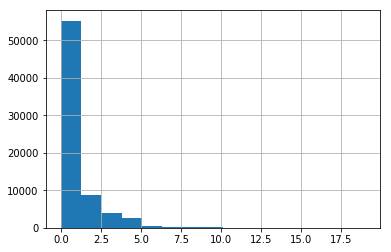

In [11]:
df.delay.hist(bins=15)

In [12]:
df.columns

Index(['index', 'time_stamp', 'stop', 'stopName', 'number', 'direction',
       'plannedTime', 'vehicleId', 'tripId', 'status', 'delay', 'seq_num'],
      dtype='object')

In [72]:
df['delay_sec'] = df['delay'].map(lambda x: x*60)
df['direction_cat'] = df['direction'].factorize()[0]
df['plannedTime'] = pd.to_datetime(df['plannedTime'])
#bad idea - +3s to mean error
df['pT_h'] = df['plannedTime'].dt.hour
#another bad idea - another +1 to mean error
df['hours_bins'] = pd.qcut(df['pT_h'], 12).factorize()[0]
df['vehicleId'].fillna(-1, inplace=True)
df['seq_num'].fillna(-1, inplace=True)
df['num_dir'] = df.apply(lambda x: '{} {}'.format(x['number'], x['direction']), axis=1).factorize()[0]
df['stop_dir'] = df.apply(lambda x: '{} {}'.format(x['number'], x['stop']), axis=1).factorize()[0]
X = df[['number', 'stop', 'direction_cat', 'vehicleId', 'seq_num', 'num_dir', 'stop_dir']].values
y = df['delay_sec'].values

In [73]:
model = DecisionTreeRegressor(max_depth=10, random_state=0)
scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')

In [74]:
np.mean(scores), np.std(scores)

(-48.9344877230454, 2.3904200248300755)

In [75]:
model = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=2, random_state=0)
score_reg = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')

In [77]:
np.mean(score_reg), np.std(score_reg)

(-48.41678471201277, 2.480921812629594)